The Trends of Happiness

By: Sreyas Chacko

I believe that happiness is the most important component of the quality of a person's life. Perhaps you may agree with that notion. At the same time, I found the idea of happiness to be confusing. As a result, I wanted to know if there were any associated trends related to happiness. So, I decided to find answers to the following:

Question 1: Is/are there a specific factor(s) that indicate(s) overall happiness in 2020? If so, what is/are it/they?

Question 2: From a worldwide perspective, do people get happier over time?

Question 3: Do the ranges of happiness scores go through a consistent change over time?

In my attempt to find an answer to these three questions, I used data science strategies. Maybe happiness, or at least an associated property related to happiness, can be quantified in some way. I obtained datasets discussing happiness and factors for each country in the world, provided through the following link: https://www.kaggle.com/mathurinache/world-happiness-report.

Throughout this tutorial, some libraries were imported to facilitate the programming process.

In [1]:
import pandas
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import numpy
from scipy.optimize import curve_fit

Question 1

Data Curation, Parsing, and Management

The first question concerns the possibility of any conditions that predict the overall happiness score of a country in 2020. Since we are looking exclusively at the 2020 data, the only dataset that needs to be parsed is "2020.csv". I got the information about parsing a .csv file from https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html?highlight=csv#pandas.read_csv.

In [2]:
data_2020 = pandas.read_csv("2020.csv")
data_2020.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


The above table is the first five rows of the dataset. By displaying the above portion of the table, I can see all of the columns and determine what are the important columns for my data analysis. For now, the columns that could be removed are "Standard error of ladder score", "upperwhisker" and "lowerwhisker", and they will be removed through material learned from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html?highlight=drop#pandas.DataFrame.drop. Removing these columns help me visualize the data better and prevent the possibility of any distraction from unnecessary values. 

In [3]:
new_data_2020 = data_2020.drop(columns = ['Standard error of ladder score', 'upperwhisker', 'lowerwhisker'])
new_data_2020.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


Exploratory Data Analysis and Hypothesis Testing/Machine Learning

Now that the table has been cleansed of any unnecessary and distracting columns, it is time to proceed with the exploratory data analysis. For the visualization, scatterplots will be generated through the strategies I learned through the following links: https://pandas.pydata.org/docs/user_guide/visualization.html?highlight=scatter, https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html#pandas.DataFrame.plot.scatter, and https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot. Scatterplots will be the type of plots used for analysis of possible trends during this tutorial because a line of best fit based on linear regression will also be generated and plotted by the use of the information from https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression and https://www.kite.com/python/answers/how-to-plot-a-line-of-best-fit-in-python, and a scatterplot gives the most clarity to the line of best fit as opposed to other data plotting methods. The line of best fit is important because it communicates the average rate of movement and helps determine the Pearson's correlation coefficient (R-score), which will be computed with the help from information obtained through https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression and serves as a way to determine how well the line fits with the data. For the purposes of this entire tutorial, a good enough R-score to suggest satisfactory evidence of a trend being indicated will be considered 0.90 or higher because of the properties of the R-score explained by the material from Slides 35 to 41 of https://cmsc320.github.io/lecs/cmsc320_f2020_lec10+11.pdf.

For each plot, the x-axis will always be "Ladder score", with the data stored in a technically 2-dimensional array where each subarray of the larger array contains only one score for the purposes of getting the program for linear regression to run without difficulty. The y-axis, will vary between the following categories: "Logged GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity", "Perceptions of corruption", and "Ladder score in Dystopia". These categories are chosen for this part of answering this question because they have the pure scores of what they are indicating within each country, as opposed to the columns beginning with "Explained by:" or the column "Dystopia + residual". The plots will determine which of the y-axis categories serves as an indicator of a country's happiness in comparison to the other countries. The equations of the lines of best fit and the R-scores will be printed through the use of information learned from https://docs.python.org/3/library/stdtypes.html#str.format.

Line of Best Fit for Ladder score vs. Logged GDP per capita: y = 0.8376385898185233*x + 4.711108918544071
R-score: 0.6012054613425841
Line of Best Fit for Ladder score vs. Social support: y = 0.08353351883036839*x + 0.3515220832914325
R-score: 0.5852261577762641
Line of Best Fit for Ladder score vs. Healthy life expectancy: y = 4.8879985571843365*x + 37.69234061236504
R-score: 0.5933871864419318
Line of Best Fit for Ladder score vs. Freedom to make life choices: y = 0.06254252086959279*x + 0.44104995127435215
R-score: 0.34880455999851057
Line of Best Fit for Ladder score vs. Generosity: y = 0.009423386827494816*x + -0.06614476382598997
R-score: 0.004766953326766021
Line of Best Fit for Ladder score vs. Perceptions of corruption: y = -0.06587924291796471*x + 1.0936931193487784
R-score: 0.17497914602417408
Line of Best Fit for Ladder score vs. Ladder score in Dystopia: y = -0.0*x + 1.9723167419999998
R-score: 1.0


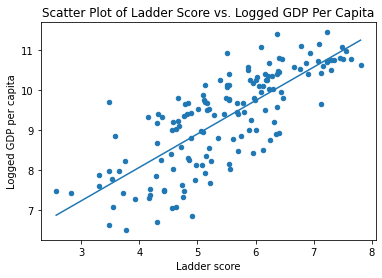

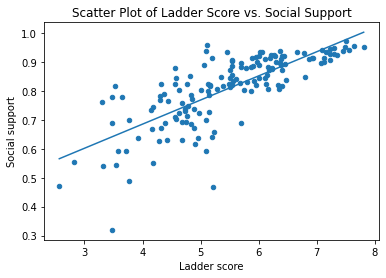

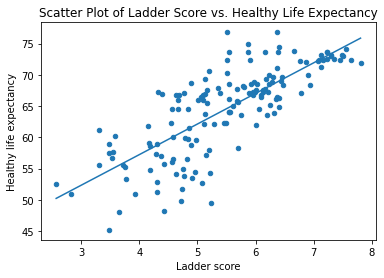

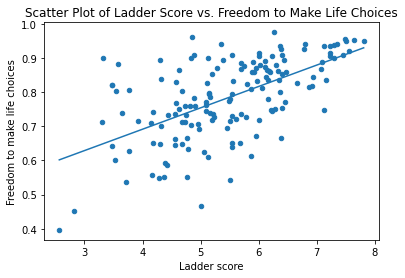

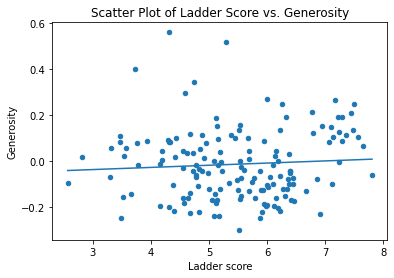

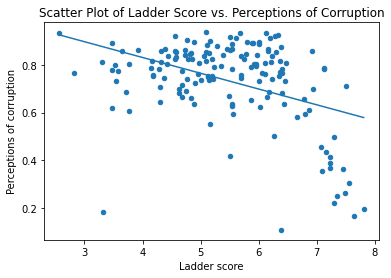

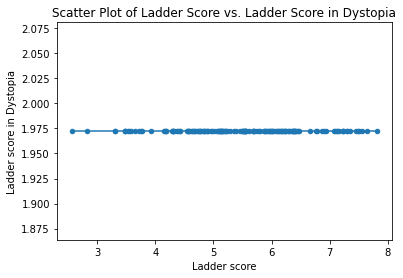

In [4]:
index = 0
scores_list = []
while (index < len(new_data_2020['Ladder score'])):
    scores_list.append([new_data_2020['Ladder score'][index]])
    index = index + 1
    
line = LinearRegression().fit(scores_list, new_data_2020['Logged GDP per capita'])
new_data_2020.plot.scatter(x = "Ladder score", y = "Logged GDP per capita", title = "Scatter Plot of Ladder Score vs. Logged GDP Per Capita")
plt.plot(new_data_2020["Ladder score"], line.coef_[0] * new_data_2020["Ladder score"] + line.intercept_)
print("Line of Best Fit for Ladder score vs. {0}: y = {1}*x + {2}".format("Logged GDP per capita", line.coef_[0], line.intercept_))
print("R-score: {0}".format(line.score(X = scores_list, y = new_data_2020['Logged GDP per capita'])))

line = LinearRegression().fit(scores_list, new_data_2020['Social support'])
new_data_2020.plot.scatter(x = "Ladder score", y = "Social support", title = "Scatter Plot of Ladder Score vs. Social Support")
plt.plot(new_data_2020["Ladder score"], line.coef_[0] * new_data_2020["Ladder score"] + line.intercept_)
print("Line of Best Fit for Ladder score vs. {0}: y = {1}*x + {2}".format("Social support", line.coef_[0], line.intercept_))
print("R-score: {0}".format(line.score(X = scores_list, y = new_data_2020['Social support'])))

line = LinearRegression().fit(scores_list, new_data_2020['Healthy life expectancy'])
new_data_2020.plot.scatter(x = "Ladder score", y = "Healthy life expectancy", title = "Scatter Plot of Ladder Score vs. Healthy Life Expectancy")
plt.plot(new_data_2020["Ladder score"], line.coef_[0] * new_data_2020["Ladder score"] + line.intercept_)
print("Line of Best Fit for Ladder score vs. {0}: y = {1}*x + {2}".format("Healthy life expectancy", line.coef_[0], line.intercept_))
print("R-score: {0}".format(line.score(X = scores_list, y = new_data_2020['Healthy life expectancy'])))

line = LinearRegression().fit(scores_list, new_data_2020['Freedom to make life choices'])
new_data_2020.plot.scatter(x = "Ladder score", y = "Freedom to make life choices", title = "Scatter Plot of Ladder Score vs. Freedom to Make Life Choices")
plt.plot(new_data_2020["Ladder score"], line.coef_[0] * new_data_2020["Ladder score"] + line.intercept_)
print("Line of Best Fit for Ladder score vs. {0}: y = {1}*x + {2}".format("Freedom to make life choices", line.coef_[0], line.intercept_))
print("R-score: {0}".format(line.score(X = scores_list, y = new_data_2020['Freedom to make life choices'])))

line = LinearRegression().fit(scores_list, new_data_2020['Generosity'])
new_data_2020.plot.scatter(x = "Ladder score", y = "Generosity", title = "Scatter Plot of Ladder Score vs. Generosity")
plt.plot(new_data_2020["Ladder score"], line.coef_[0] * new_data_2020["Ladder score"] + line.intercept_)
print("Line of Best Fit for Ladder score vs. {0}: y = {1}*x + {2}".format("Generosity", line.coef_[0], line.intercept_))
print("R-score: {0}".format(line.score(X = scores_list, y = new_data_2020['Generosity'])))

line = LinearRegression().fit(scores_list, new_data_2020['Perceptions of corruption'])
new_data_2020.plot.scatter(x = "Ladder score", y = "Perceptions of corruption", title = "Scatter Plot of Ladder Score vs. Perceptions of Corruption")
plt.plot(new_data_2020["Ladder score"], line.coef_[0] * new_data_2020["Ladder score"] + line.intercept_)
print("Line of Best Fit for Ladder score vs. {0}: y = {1}*x + {2}".format("Perceptions of corruption", line.coef_[0], line.intercept_))
print("R-score: {0}".format(line.score(X = scores_list, y = new_data_2020['Perceptions of corruption'])))

line = LinearRegression().fit(scores_list, new_data_2020['Ladder score in Dystopia'])
new_data_2020.plot.scatter(x = "Ladder score", y = "Ladder score in Dystopia", title = "Scatter Plot of Ladder Score vs. Ladder Score in Dystopia")
plt.plot(new_data_2020["Ladder score"], line.coef_[0] * new_data_2020["Ladder score"] + line.intercept_)
print("Line of Best Fit for Ladder score vs. {0}: y = {1}*x + {2}".format("Ladder score in Dystopia", line.coef_[0], line.intercept_))
print("R-score: {0}".format(line.score(X = scores_list, y = new_data_2020['Ladder score in Dystopia'])))

What I observe is a positive correlation for the graphs whose y-axes are "Logged GDP per capita", "Social support", "Healthy life expectancy", and "Freedom to make life choices". I also see what seems to be a negative correlation between "Ladder score" and "Perceptions of corruption". For the graph with the y-axis labeled "Generosity", there does not seem to be any definitive correlation, as the plots are too scattered all over the place. As for the graph with the y-axis labeled "Ladder score in Dystopia", there does not seem to be any definitive correlation because the dots seem to have similar y-axis coordinates, indicating similar scores. With regard to the lines of best fit, those lines, in addition to their corresponding equations, in plots with an apparent positive correlation seem to roughly align with many of the points. With the plot that seems to have a negative correlation, a polynomial of degree 2 (quadratic) seems to be more appropriate because the data seems to move in a quadratic shape. As for the others with no obvious correlation, the equations of the lines and the lines themselves seem to confirm that the line of best fit is not a good indicator for the corresponding categories. Focusing on the R-scores, while some of the scores indicate a form of correlation, I could not find an R-score that makes me feel confident in saying that one attribute conclusively indicates a certain level of happiness. Even with the R-score of the plot with the y-axis labeled "Ladder score in Dystopia" being 1.0, the slope of the line is 0.0, meaning that it does not indicate a country's happiness level.

Because the plot with "Perceptions of corruption" as the y-axis looks to be better fit with a quadratic, a quadratic should be created for better visualization and analysis of the plot. I got the information for creating and plotting the quadratic of best fit through https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html and https://www.kite.com/python/answers/how-to-plot-a-line-of-best-fit-in-python. In addition, I calculated the R-score through the use of information obtained from slide 39 of https://cmsc320.github.io/lecs/cmsc320_f2020_lec10+11.pdf and https://pandas.pydata.org/docs/user_guide/computation.html?highlight=standard%20deviation, while the outputs of the quadratic equation and the R-score were generated through the use of the material learned from https://docs.python.org/3/library/stdtypes.html#str.format. Also, the same sources that were used to generate the previous scatterplots, https://pandas.pydata.org/docs/user_guide/visualization.html?highlight=scatter, https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html#pandas.DataFrame.plot.scatter, and https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot, will help me generate the scatterplot for this segment.

Quadratic of best fit for Ladder score vs. Perceptions of Corruption: y = -0.4540008156290618 + 0.5308344416884114*x + -0.055098297273126186*x^2
R-score: -0.41557106707776653


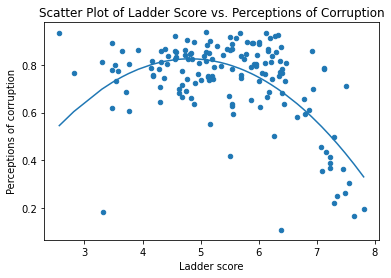

In [5]:
def function(x, a, b, c):
    return a*x + b*(x**2) + c
values, covariance = curve_fit(function, new_data_2020['Ladder score'], new_data_2020['Perceptions of corruption'])

new_data_2020.plot.scatter(x = "Ladder score", y = "Perceptions of corruption", title = "Scatter Plot of Ladder Score vs. Perceptions of Corruption")
plt.plot(new_data_2020["Ladder score"], values[0] * new_data_2020["Ladder score"] + values[1] * (new_data_2020["Ladder score"]**2) + values[2])
print("Quadratic of best fit for Ladder score vs. Perceptions of Corruption: y = {0} + {1}*x + {2}*x^2".format(values[2], values[0], values[1]))

index = 0
cov = 0
while (index < len(new_data_2020['Ladder score'])):
    cov = cov + ((new_data_2020['Ladder score'][index] - new_data_2020['Ladder score'].mean())*(new_data_2020['Perceptions of corruption'][index] - new_data_2020['Perceptions of corruption'].mean()))
    index = index + 1
cov = cov / len(new_data_2020['Ladder score'])
correlation = cov / (new_data_2020['Ladder score'].std() * new_data_2020['Perceptions of corruption'].std())
print("R-score: {0}".format(correlation))

From looking at the plot, I observe that the vertex of the polynomial is around the top middle of the plot, which is in the area where most of the data points are located. As a result, the equation of the quadratic makes sense from a correlation perspective, especially with regard to the x^2 term. I also noticed that the R-score is negative, indicating how in the right portion of the graph, as the ladder score increases, corruption tends to decrease, even though the left portion shows an increase of corruption for an increase of the ladder score, though that may be partially attributed to the presence of an egregious outlier, specifically the point whose x-value is between 3 and 4 and the y-value being around 0.2.

It seems like that the concrete answers to see if an indicator variable of happiness exists within the dataset are not found yet. As a result, the analysis should now focus on the other columns with float values, meaning the columns whose titles start with "Explained by:" and the column "Dystopia + residual", to see if any conclusive evidence exists regarding one factor's indication of a country's happiness. The analysis of those columns would follow the same strategies as what was done with the columns that have already been studied, through first generating scatterplots of the data and finding the lines of best fit and R-scores through linear regression. The 2-D array that stored the scores earlier will also be used in this upcoming portion of the tutorial.

The resources used in this part of the tutorial have been used previously for the analysis of columns containing the raw scores of factors, with the scatterplot generation being aided by information from https://pandas.pydata.org/docs/user_guide/visualization.html?highlight=scatter, https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html#pandas.DataFrame.plot.scatter, and https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot, linear regression lines being plotted with the help from https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression and https://www.kite.com/python/answers/how-to-plot-a-line-of-best-fit-in-python, and the R-scores being determined by learned material from https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression. The output has been created with help from https://docs.python.org/3/library/stdtypes.html#str.format, which was used to create previous outputs.

Line of Best Fit for Ladder Score vs. Explained by: Log GDP per capita: y = 0.25961461040961653*x + -0.5521618971622974
R-score: 0.6012054532598909
Line of Best Fit for Ladder Score vs. Explained by: Social support: y = 0.19730133699896701*x + 0.07572913897116762
R-score: 0.5852261533000507
Line of Best Fit for Ladder Score vs. Explained by: Healthy life expectancy: y = 0.17597557973453096*x + -0.2702874856819658
R-score: 0.5933871825332382
Line of Best Fit for Ladder Score vs. Explained by: Freedom to make life choices: y = 0.07496022311128309*x + 0.053307751229416
R-score: 0.34880457251204855
Line of Best Fit for Ladder Score vs. Explained by: Generosity: y = 0.0062323050252943565*x + 0.15526393696609442
R-score: 0.004766953591136214
Line of Best Fit for Ladder Score vs. Explained by: Perceptions of corruption: y = 0.04253364392710095*x + -0.10207932113380142
R-score: 0.17497914221398936
Line of Best Fit for Ladder Score vs. Dystopia + residual: y = 0.24337912837871212*x + 0.64024441

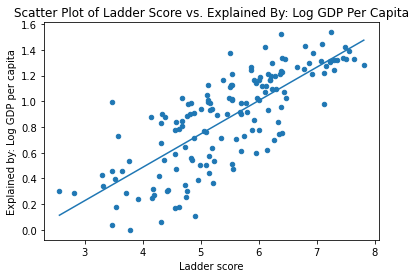

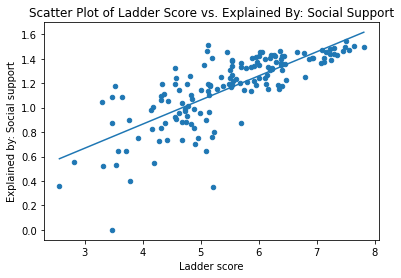

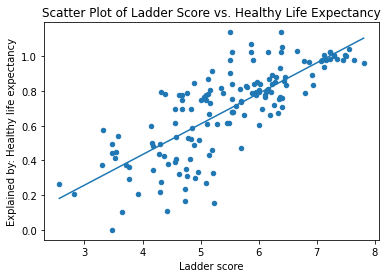

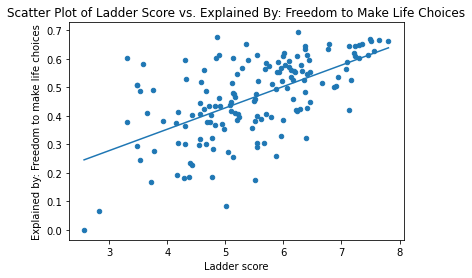

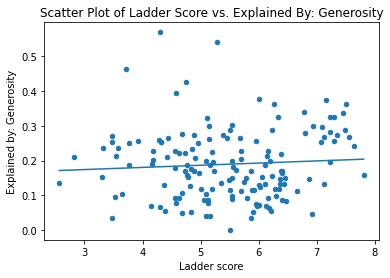

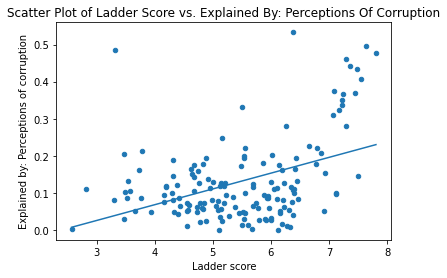

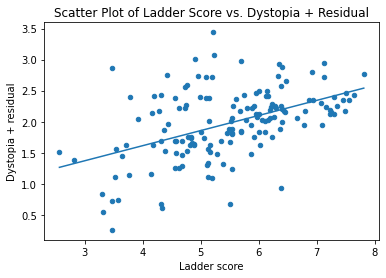

In [7]:
e_line = LinearRegression().fit(scores_list, new_data_2020['Explained by: Log GDP per capita'])
new_data_2020.plot.scatter(x = "Ladder score", y = "Explained by: Log GDP per capita", title = "Scatter Plot of Ladder Score vs. Explained By: Log GDP Per Capita")
plt.plot(new_data_2020['Ladder score'], e_line.coef_[0] * new_data_2020['Ladder score'] + e_line.intercept_)
print("Line of Best Fit for Ladder Score vs. {0}: y = {1}*x + {2}".format("Explained by: Log GDP per capita", e_line.coef_[0], e_line.intercept_))
print("R-score: {0}".format(e_line.score(X = scores_list, y = new_data_2020['Explained by: Log GDP per capita'])))

e_line = LinearRegression().fit(scores_list, new_data_2020['Explained by: Social support'])
new_data_2020.plot.scatter(x = "Ladder score", y = "Explained by: Social support", title = "Scatter Plot of Ladder Score vs. Explained By: Social Support")
plt.plot(new_data_2020['Ladder score'], e_line.coef_[0] * new_data_2020['Ladder score'] + e_line.intercept_)
print("Line of Best Fit for Ladder Score vs. {0}: y = {1}*x + {2}".format("Explained by: Social support", e_line.coef_[0], e_line.intercept_))
print("R-score: {0}".format(e_line.score(X = scores_list, y = new_data_2020['Explained by: Social support'])))

e_line = LinearRegression().fit(scores_list, new_data_2020['Explained by: Healthy life expectancy'])
new_data_2020.plot.scatter(x = "Ladder score", y = "Explained by: Healthy life expectancy", title = "Scatter Plot of Ladder Score vs. Healthy Life Expectancy")
plt.plot(new_data_2020['Ladder score'], e_line.coef_[0] * new_data_2020['Ladder score'] + e_line.intercept_)
print("Line of Best Fit for Ladder Score vs. {0}: y = {1}*x + {2}".format("Explained by: Healthy life expectancy", e_line.coef_[0], e_line.intercept_))
print("R-score: {0}".format(e_line.score(X = scores_list, y = new_data_2020['Explained by: Healthy life expectancy'])))

e_line = LinearRegression().fit(scores_list, new_data_2020['Explained by: Freedom to make life choices'])
new_data_2020.plot.scatter(x = "Ladder score", y = "Explained by: Freedom to make life choices", title = "Scatter Plot of Ladder Score vs. Explained By: Freedom to Make Life Choices")
plt.plot(new_data_2020['Ladder score'], e_line.coef_[0] * new_data_2020['Ladder score'] + e_line.intercept_)
print("Line of Best Fit for Ladder Score vs. {0}: y = {1}*x + {2}".format("Explained by: Freedom to make life choices", e_line.coef_[0], e_line.intercept_))
print("R-score: {0}".format(e_line.score(X = scores_list, y = new_data_2020['Explained by: Freedom to make life choices'])))

e_line = LinearRegression().fit(scores_list, new_data_2020['Explained by: Generosity'])
new_data_2020.plot.scatter(x = "Ladder score", y = "Explained by: Generosity", title = "Scatter Plot of Ladder Score vs. Explained By: Generosity")
plt.plot(new_data_2020['Ladder score'], e_line.coef_[0] * new_data_2020['Ladder score'] + e_line.intercept_)
print("Line of Best Fit for Ladder Score vs. {0}: y = {1}*x + {2}".format("Explained by: Generosity", e_line.coef_[0], e_line.intercept_))
print("R-score: {0}".format(e_line.score(X = scores_list, y = new_data_2020['Explained by: Generosity'])))

e_line = LinearRegression().fit(scores_list, new_data_2020['Explained by: Perceptions of corruption'])
new_data_2020.plot.scatter(x = "Ladder score", y = "Explained by: Perceptions of corruption", title = "Scatter Plot of Ladder Score vs. Explained By: Perceptions Of Corruption")
plt.plot(new_data_2020['Ladder score'], e_line.coef_[0] * new_data_2020['Ladder score'] + e_line.intercept_)
print("Line of Best Fit for Ladder Score vs. {0}: y = {1}*x + {2}".format("Explained by: Perceptions of corruption", e_line.coef_[0], e_line.intercept_))
print("R-score: {0}".format(e_line.score(X = scores_list, y = new_data_2020['Explained by: Perceptions of corruption'])))

e_line = LinearRegression().fit(scores_list, new_data_2020['Dystopia + residual'])
new_data_2020.plot.scatter(x = "Ladder score", y = "Dystopia + residual", title = "Scatter Plot of Ladder Score vs. Dystopia + Residual")
plt.plot(new_data_2020['Ladder score'], e_line.coef_[0] * new_data_2020['Ladder score'] + e_line.intercept_)
print("Line of Best Fit for Ladder Score vs. {0}: y = {1}*x + {2}".format("Dystopia + residual", e_line.coef_[0], e_line.intercept_))
print("R-score: {0}".format(e_line.score(X = scores_list, y = new_data_2020['Dystopia + residual'])))

From looking at the plots, lines of best fit, the equations of those lines, and the R-scores, the results are generally the same as those for the raw scores of each factor, with the exception of the graph with "Dystopia + residual" as the y-axis variable, and even with that exception, the R-score is nowhere near high enough for me to definitively determine that "Dystopia + residual" is a predictor variable to indicate a country's happiness. Furthermore, the slope of the line of best fit, which is displayed in the corresponding equation, in the aforementioned plot is not of great magnitude, especially considering the fact that many data points in that plot are all over the place and far from the line, thereby resulting in an R-score that suggests a relatively weak positive correlation. Regarding the graph with "Explained by: Perceptions of corruption" as the y-variable, it appears to be a flipped version of the graph with the pure "Perceptions of corruption" scores. 

To validate my observation regarding the plot with the y-axis variable, "Explained by: Perceptions of corruption", a quadratic of best fit will be used, and the strategy for creating and plotting the quadratic will be the same as the strategy for creating and plotting the previous quadratic, meaning the use of https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html and https://www.kite.com/python/answers/how-to-plot-a-line-of-best-fit-in-python to help me compute and plot the polynomial once again. Likewise, slide 39 of https://cmsc320.github.io/lecs/cmsc320_f2020_lec10+11.pdf and https://pandas.pydata.org/docs/user_guide/computation.html?highlight=standard%20deviation will help me calculate the R-score, while https://docs.python.org/3/library/stdtypes.html#str.format will help me output the polynomial equation and the R-score for the polynomial generated by this segment of the program, just like how those sources helped me communicate data surrounding the other plot that needed a polynomial to express the data more effectively. In addition, the sources https://pandas.pydata.org/docs/user_guide/visualization.html?highlight=scatter, https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html#pandas.DataFrame.plot.scatter, and https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot will assist me with the scatterplot as those sources have done before.

Quadratic of Best Fit for Ladder score vs. Explained by: Perceptions of corruption: y = 0.8971589513300087 + -0.3427228582035987*x + 0.035573136399778646*(x^2)
R-score: 0.4155710625532204


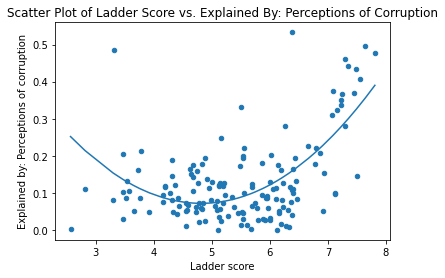

In [8]:
e_values, e_covariance = curve_fit(function, new_data_2020['Ladder score'], new_data_2020['Explained by: Perceptions of corruption'])

new_data_2020.plot.scatter(x = "Ladder score", y = "Explained by: Perceptions of corruption", title = "Scatter Plot of Ladder Score vs. Explained By: Perceptions of Corruption")
plt.plot(new_data_2020['Ladder score'], e_values[0]*new_data_2020['Ladder score'] + e_values[1]*(new_data_2020['Ladder score']**2) + e_values[2])
print("Quadratic of Best Fit for Ladder score vs. Explained by: Perceptions of corruption: y = {0} + {1}*x + {2}*(x^2)".format(e_values[2], e_values[0], e_values[1]))

index = 0
cov = 0
while (index < len(new_data_2020['Explained by: Perceptions of corruption'])):
    cov = cov + (new_data_2020['Ladder score'][index] - new_data_2020['Ladder score'].mean())*(new_data_2020['Explained by: Perceptions of corruption'][index] - new_data_2020['Explained by: Perceptions of corruption'].mean())
    index = index + 1
cov = cov / len(new_data_2020['Explained by: Perceptions of corruption'])
cor = cov/(new_data_2020['Ladder score'].std() * new_data_2020['Explained by: Perceptions of corruption'].std())
print("R-score: {0}".format(cor))

The R-score of the above polynomial of best fit, which is the positive version of the R-score for the polynomial of best fit for the raw "Perceptions of corruption" scores, does not conclusively show a trend like its counterpart for the raw values because, as with the other R-scores calculated in previous tests of this tutorial, it is not high enough to communicate a certain conclusion.

Conclusion

From the fact that none of the R-scores generated have been high enough to warrant an interpretation that the scores of the y-axis variable indicates certain levels of happiness, we can determine that there are no definitive variables that indicate happiness in 2020 on its own. Moreover, before I tested the columns starting with "Explained by:", I thought that the data these columns would have been modified in a way where a trend is more apparent. However, I realized after creating the plots that the modifications seemed to be only a rescaling of the raw scores. As a result of the inconclusive nature of what the observations are, this conclusion presents a potential indication that happiness is a very complicated, albeit good, feeling. It could very well mean that people from different parts of the world value different things in life. However, it could also mean that the methodology of obtaining these scores is flawed in some way, as the description provided in the "Content" section of https://www.kaggle.com/mathurinache/world-happiness-report states that "The joy scores and rankings utilize information from the Gallup World Survey." The lack of definitive answers only allows for speculation regarding why no answers presented themselves during the process of answering the question concerning the existence of attributes that indicate a certain happiness score.

Question 2

Data Curation, Parsing, and Management

I also wondered if people around the world get happier over time. So, I will use the datasets about happiness from 2015 to 2020 to help me answer my question because the measurement is with respect to time. Since I have yet to take in the data from 2015 to 2019, once again, I will use what I learned from https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html?highlight=csv#pandas.read_csv to help me obtain information from the necessary datasets because they are also .csv files.

In [9]:
data_2015 = pandas.read_csv("2015.csv")
print("2015 Data:")
print(data_2015.head())

data_2016 = pandas.read_csv("2016.csv")
print("2016 Data:")
print(data_2016.head())

data_2017 = pandas.read_csv("2017.csv")
print("2017 Data:")
print(data_2017.head())

data_2018 = pandas.read_csv("2018.csv")
print("2018 Data:")
print(data_2018.head())

data_2019 = pandas.read_csv("2019.csv")
print("2019 Data:")
print(data_2019.head())

2015 Data:
       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938

Obtaining the data of each dataset and printing the first few rows for each dataset will help determine which columns of one set align with those of another set. The next step is to take the mean of the overall scores per year, putting the data into a DataFrame structure, and outputting the resulting DataFrame because the analysis for this question concerns the entire world. I learned the necessary strategies for calculating the mean of a column and creating a DataFrame from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html?highlight=dataframe#pandas.DataFrame.

In [10]:
mean_2015 = data_2015['Happiness Score'].mean()
mean_2016 = data_2016['Happiness Score'].mean()
mean_2017 = data_2017['Happiness.Score'].mean()
mean_2018 = data_2018['Score'].mean()
mean_2019 = data_2019['Score'].mean()
mean_2020 = data_2020['Ladder score'].mean()
annual_mean_scores = pandas.DataFrame(numpy.array([[2015, mean_2015], [2016, mean_2016], [2017, mean_2017], [2018, mean_2018], [2019, mean_2019], [2020, mean_2020]]), columns = ['Year', 'Average Score'])
annual_mean_scores

,Year,Average Score
0,2015.0,5.375734
1,2016.0,5.382185
2,2017.0,5.354019
3,2018.0,5.375917
4,2019.0,5.407096
5,2020.0,5.473240


Exploratory Data Analysis and Hypothesis Testing/Machine Learning

Now that the average scores for each year have been obtained, we can obtain the plot and the line of best fit through graphing and computing operations. A scatterplot will be used as the plot for the communication of the mean scores per year for the same reason why it has been used for the plotting of the scores of each of the countries within the dataset for a certain attribute: the hosting of the line of best fit. Furthermore, the years will be fitted into a 2-dimensional array just like the happiness scores from earlier in the tutorial because the code for linear regression needs to work properly.

The links https://pandas.pydata.org/docs/user_guide/visualization.html?highlight=scatter, https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html#pandas.DataFrame.plot.scatter, and https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot, will help me with the creation of the scatterplot to help answer this question like it helped me answer the previous question. Furthermore, https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression and https://www.kite.com/python/answers/how-to-plot-a-line-of-best-fit-in-python will help me generate and plot the linear regression-derived line of best fit, as they did with the previous lines of best fit, and like previous R-scores for lines of best fit, this R-score will be generated by information from https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression. In addition, https://docs.python.org/3/library/stdtypes.html#str.format will help me create the output conveying the line of best fit and R-score, just as it did in the previous parts of the tutorial.

Line of Best Fit for Year vs. Average Score: y = 0.016690287442178205*x + -28.27795642630663
R-score: 0.551070375717138


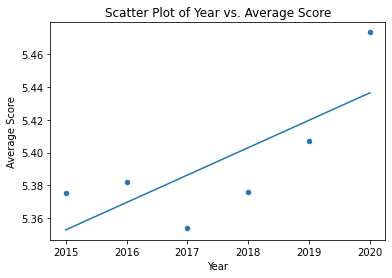

In [11]:
annual_mean_scores.plot.scatter(x = "Year", y = "Average Score", title = "Scatter Plot of Year vs. Average Score")

year_list = []
index = 0
while (index < len(annual_mean_scores['Year'])):
    year_list.append([annual_mean_scores['Year'][index]])
    index = index + 1
    
line_best_fit = LinearRegression().fit(year_list, annual_mean_scores['Average Score'])
plt.plot(annual_mean_scores["Year"], line_best_fit.coef_[0] * annual_mean_scores["Year"] + line_best_fit.intercept_)
print("Line of Best Fit for Year vs. Average Score: y = {0}*x + {1}".format(line_best_fit.coef_[0], line_best_fit.intercept_))
print("R-score: {0}".format(line_best_fit.score(X = year_list, y = annual_mean_scores['Average Score'])))

Conclusion

The R-score is not good enough to conclusively say that people get happier over time, even though it does indicate a positive correlation of some form, because it is too far away from 1. Hence, even though the slope indicated by the equation of the line conveys a marginal positive increase, enough of the points are too far away from the line to prevent the concrete suggestion of a projection regarding mean happiness with respect to year. The possibility still theoretically exists that the above plot could be part of some overall trend, as the data analyzed is in a span of only 6 years. However, it is only conjecture because the data that we do have does not seem to be enough to draw a substansive conclusion. What could be determined from the plot is that there is a net increase of the average happiness score from 2015 to 2020, which explains the upward slope of the line and in fact could be determined by just looking at the points themselves. Moreover, the mysterious possibilities surrounding the results of the attempts to answer this question solidify a possible notion mentioned in the conclusion to the first question: happiness is hard to comprehend.

Question 3

Data Curation, Parsing, and Management

Finally, I wanted to observe if the ranges of happiness scores have the behavior of increasing over time at a certain rate or decreasing over time at a certain rate. The necessary datasets have been parsed earlier in the tutorial, reducing the number of steps we have to do to resolve my curiosity. Once again, https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html?highlight=dataframe#pandas.DataFrame will be used to help me with creating the DataFrame.

In [12]:
range_2015 = data_2015['Happiness Score'][0] - data_2015['Happiness Score'][len(data_2015['Happiness Score']) - 1]
range_2016 = data_2016['Happiness Score'][0] - data_2016['Happiness Score'][len(data_2016['Happiness Score']) - 1]
range_2017 = data_2017['Happiness.Score'][0] - data_2017['Happiness.Score'][len(data_2017['Happiness.Score']) - 1]
range_2018 = data_2018['Score'][0] - data_2018['Score'][len(data_2018['Score']) - 1]
range_2019 = data_2019['Score'][0] - data_2019['Score'][len(data_2019['Score']) - 1]
range_2020 = data_2020['Ladder score'][0] - data_2020['Ladder score'][len(data_2020['Ladder score']) - 1]
annual_range_scores = pandas.DataFrame(numpy.array([[2015, range_2015], [2016, range_2016], [2017, range_2017], [2018, range_2018], [2019, range_2019], [2020, range_2020]]), columns = ["Year", "Range of Happiness Scores"])
annual_range_scores

,Year,Range of Happiness Scores
0,2015.0,4.7480
1,2016.0,4.6210
2,2017.0,4.8440
3,2018.0,4.7270
4,2019.0,4.9160
5,2020.0,5.2418


Exploratory Data Analysis and Hypothesis Testing/Machine Learning

Since the list of years, 'year_list', with each year in its own subarray, has already been calculated for a previous linear regression calculation, a new list does not have to be calculated again. Nevertheless, we need to generate another scatterplot (https://pandas.pydata.org/docs/user_guide/visualization.html?highlight=scatter, https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html#pandas.DataFrame.plot.scatter, and https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot), reuse linear regression strategies (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression and https://www.kite.com/python/answers/how-to-plot-a-line-of-best-fit-in-python) to calculate the line of best fit for the scatterplot, find the R-score (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression), and output the needed information (https://docs.python.org/3/library/stdtypes.html#str.format) to understand the significance of the data plotted from the DataFrame above.

Line of Best Fit for Year vs. Range of Happiness Scores: y = 0.09248572139744331*x + -181.74030955749362
R-score: 0.6346147167645937


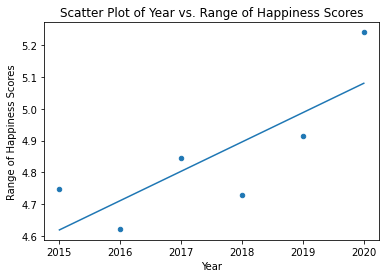

In [13]:
annual_range_scores.plot.scatter(x = "Year", y = "Range of Happiness Scores", title = "Scatter Plot of Year vs. Range of Happiness Scores")
line_bf = LinearRegression().fit(year_list, annual_range_scores['Range of Happiness Scores'])
plt.plot(annual_range_scores['Year'], line_bf.coef_[0] * annual_range_scores['Year'] + line_bf.intercept_)
print("Line of Best Fit for Year vs. Range of Happiness Scores: y = {0}*x + {1}".format(line_bf.coef_[0], line_bf.intercept_))
print("R-score: {0}".format(line_bf.score(X = year_list, y = annual_range_scores['Range of Happiness Scores'])))

Conclusion

While the R-score definitely indicates a positive correlation, it is not close enough to 1 to make the claim that the range of happiness scores has a consistent behavior over the course of time, let alone consistently increasing. Furthermore, the fact that the data points often bounce from one side of the line to the other side of the line solidifies the notion of not enough evidence. In addition, the bouncing nature of each data point possibly indicates a level of volatility regarding the ranges of happiness, in spite of the net positivity communicated by the equation of the line of best fit. The other speculations surrounding this question are similar to the speculations from the previous question in the sense that data from more years could provide more information regarding trends over time. 

Aside from conjecture, the results from this question seem to magnify how complicated the subject of happiness seems with respect to predictions of happiness through data science, as stated in the conclusions of the previous questions. After all, happiness is merely a feeling exhibited by humans, and this question, along with the previous questions, depict the idea that the happiness data, at least the data available during the testing processes, is not sufficient enough to provide a satisfactory answer to the questions. Perhaps it shows that data science, while very useful, can have its limitations. If that is the case, then using data science as the only justification for a decision might not be the best option, and other components may be needed for consideration surrounding the decisions needed to be made.